In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from typing import List

In [21]:
## Two options:
## 'balance': same number of training events for signal and bkg
## 'bkgskew' uses 4 mln events of bkg, 500k of signal
dataset_type = 'bkgskew'

In [22]:
if dataset_type not in ['balance', 'bkgskew']:
    raise ValueError

In [23]:
## What you ran perform_grid_search with
scanned_grid = {
    'learning_rate': [0.003, 0.006, 0.010, 0.015],
    'max_leaf_nodes': [100, 200, 400, 800],
    'max_iter'    : [1500, 2500, 5000],
}

In [24]:
csv_dir = './results/'
csv_file = csv_dir + 'HBDT_crossval_results_' + dataset_type + '.csv'

In [25]:
df_cvres = pd.read_csv(csv_file)
df_cvres

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_iter,param_max_leaf_nodes,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,732.625516,101.363839,31.354881,3.964952,0.003,1500,100,"{'learning_rate': 0.003, 'max_iter': 1500, 'ma...",0.811464,0.806743,...,0.804357,0.004193,48,0.823478,0.823923,0.824818,0.824796,0.825584,0.824520,7.402109e-04
1,911.368999,118.317135,26.147982,1.332827,0.003,1500,200,"{'learning_rate': 0.003, 'max_iter': 1500, 'ma...",0.818492,0.814247,...,0.812644,0.003415,47,0.848198,0.848860,0.849894,0.849994,0.850498,0.849489,8.365701e-04
2,960.241465,26.334034,29.148861,0.736109,0.003,1500,400,"{'learning_rate': 0.003, 'max_iter': 1500, 'ma...",0.824749,0.819694,...,0.818257,0.003661,46,0.884476,0.884864,0.885764,0.885484,0.886345,0.885387,6.591790e-04
3,1143.152346,13.260187,28.364360,0.616227,0.003,1500,800,"{'learning_rate': 0.003, 'max_iter': 1500, 'ma...",0.828211,0.823386,...,0.821956,0.003579,44,0.934868,0.934853,0.935608,0.935451,0.935925,0.935341,4.210921e-04
4,1275.849802,17.335829,48.277822,4.285619,0.003,2500,100,"{'learning_rate': 0.003, 'max_iter': 2500, 'ma...",0.825114,0.820951,...,0.819122,0.003576,45,0.847610,0.848111,0.849331,0.848946,0.850061,0.848812,8.697251e-04
5,1528.077805,11.664789,48.799717,3.379654,0.003,2500,200,"{'learning_rate': 0.003, 'max_iter': 2500, 'ma...",0.831632,0.828101,...,0.826246,0.003300,42,0.879718,0.880047,0.881009,0.880661,0.881262,0.880539,5.787820e-04
6,1777.592501,21.340325,50.224735,0.881766,0.003,2500,400,"{'learning_rate': 0.003, 'max_iter': 2500, 'ma...",0.836890,0.832400,...,0.830973,0.003445,37,0.925401,0.925238,0.926210,0.925733,0.926486,0.925813,4.726088e-04
7,2090.170125,25.190240,47.206813,2.507549,0.003,2500,800,"{'learning_rate': 0.003, 'max_iter': 2500, 'ma...",0.838518,0.834101,...,0.832716,0.003382,36,0.976605,0.976733,0.976983,0.976714,0.977037,0.976814,1.661893e-04
8,2226.661175,16.184232,94.041957,4.064788,0.003,5000,100,"{'learning_rate': 0.003, 'max_iter': 5000, 'ma...",0.834910,0.832115,...,0.829900,0.003225,38,0.881534,0.881984,0.883400,0.882763,0.883430,0.882622,7.573665e-04
9,2577.462420,44.329451,89.714711,2.576939,0.003,5000,200,"{'learning_rate': 0.003, 'max_iter': 5000, 'ma...",0.839144,0.836645,...,0.834564,0.002982,30,0.923598,0.923962,0.925593,0.925462,0.925103,0.924744,8.114120e-04


In [26]:
## Define column 'diff_score', difference between train and test.
## Train is always better than testing, unless you somehow managed
## to create a sentient AI.
df_cvres['diff_score'] = df_cvres['mean_train_score'] - df_cvres['mean_test_score']
## Drop pointless dictionary column
df_cvres.drop(columns=['params'], inplace=True, errors='ignore')
## Rename parameter columns
df_cvres.rename({'param_max_leaf_nodes' : 'max_leaf_nodes',
                 'param_learning_rate' : 'learning_rate',
                 'param_max_iter' : 'max_iter'}, inplace=True, axis='columns', errors='ignore')

In [27]:
# ## List of hyperparameters preceded by 'param_', i.e. how they appaear in the results
# param_column_list = [f'param_{name}' for name in scanned_grid.keys()]

# ## First create test score results
# ## Extract split scores and parameter 
# df_test_scores = df_cvres.loc[:, param_column_list + [f'split{i}_test_score' for i in range(5)]]
# ## Set hyperpar values as indices
# df_test_scores.set_index(param_column_list, inplace=True)
# ## Omit split score designation, just leave the iterator
# df_test_scores.rename({f'split{i}_test_score' : i for i in range(5)}, inplace=True, axis='columns')
# ## Stack the dataframe, i.e. the splits become another multi-index
# ## I'm just riffing at this point, I have no idea why Salvatore did this
# df_test_scores = pd.DataFrame(df_test_scores.stack()).rename({0 : 'score'}, axis='columns')
# ## Create dataset column
# df_test_scores['dataset'] = 'test'
# ## Turn it into an index, fuck if I know
# df_test_scores.set_index('dataset', inplace=True, append=True)
# ## See the unnamed index from before? The split? It has a name now
# df_test_scores.index.set_names(names='split', level=len(param_column_list), inplace=True)

# ## Now do the exact same thing for train
# df_train_scores = df_cvres.loc[:, param_column_list + [f'split{i}_train_score' for i in range(5)]]
# df_train_scores.set_index(param_column_list, inplace=True)
# df_train_scores.rename({f'split{i}_train_score' : i for i in range(5)}, inplace=True, axis='columns')
# df_train_scores = pd.DataFrame(df_train_scores.stack()).rename({0 : 'score'}, axis='columns')
# df_train_scores['dataset'] = 'train'
# df_train_scores.set_index('dataset', inplace=True, append=True)
# df_train_scores.index.set_names(names='split', level=len(param_column_list), inplace=True)

# ## Concat and trash. Now the indices are columns.
# ## I'm sure there's a point, I'm just too dumb to get it
# df_scores = pd.concat([df_test_scores, df_train_scores]).reset_index()
# del(df_test_scores, df_train_scores)

# ## And now we turn the columns back into indices
# df_scores.set_index(param_column_list + ['split', 'dataset'], inplace=True)

# ## Compute difference in score
# df_scores_train = df_scores.loc[df_scores.index.get_level_values('dataset')=='train', :].droplevel('dataset', axis='rows')
# df_scores_test = df_scores.loc[df_scores.index.get_level_values('dataset')=='test', :].droplevel('dataset', axis='rows')
# df_scores_diff = df_scores_train - df_scores_test
# df_scores['score difference'] = df_scores_diff['score']

# del(df_scores_train, df_scores_test, df_scores_diff)

# df_scores.reset_index(inplace=True)
# df_scores.rename({'param_max_leaf_nodes' : 'max # of leaf nodes per tree',
#                   'param_learning_rate' : 'learning rate',
#                   'param_max_iter' : '# of trees'
#                  }, inplace=True, axis='columns')

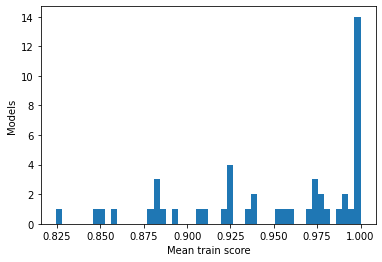

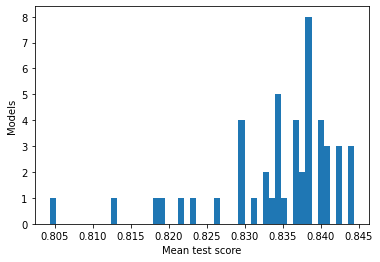

In [28]:
plt.hist(df_cvres['mean_train_score'], bins=50, histtype='bar', stacked=True)
plt.xlabel('Mean train score')
plt.ylabel('Models')
plt.show()

plt.hist(df_cvres['mean_test_score'], bins=50, histtype='bar', stacked=True)
plt.xlabel('Mean test score')
plt.ylabel('Models')
plt.show()

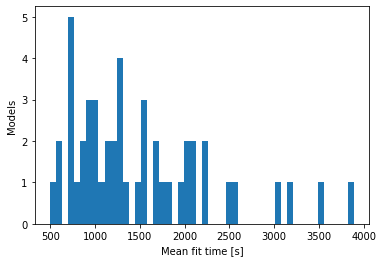

In [29]:
plt.hist(df_cvres['mean_fit_time'], bins=50, histtype='bar', stacked=True)
plt.xlabel('Mean fit time [s]')
plt.ylabel('Models')
plt.show()

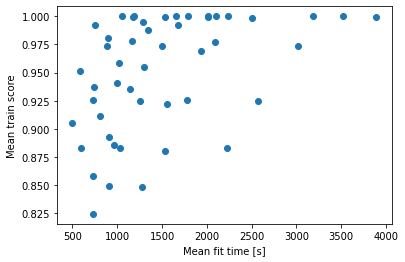

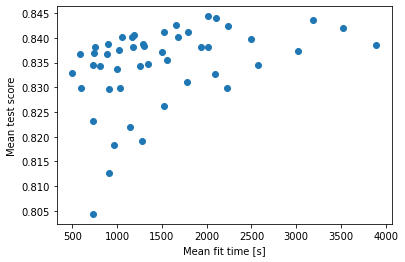

In [30]:
plt.scatter(df_cvres['mean_fit_time'], df_cvres['mean_train_score'])
plt.xlabel("Mean fit time [s]")
plt.ylabel("Mean train score")
plt.show()

plt.scatter(df_cvres['mean_fit_time'], df_cvres['mean_test_score'])
plt.xlabel("Mean fit time [s]")
plt.ylabel("Mean test score")
plt.show()

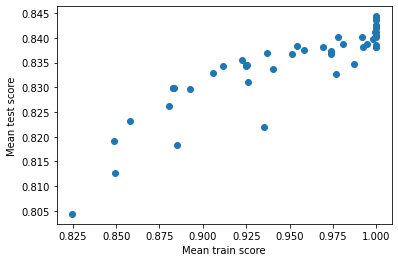

In [31]:
plt.scatter(df_cvres['mean_train_score'], df_cvres['mean_test_score'])
plt.xlabel("Mean train score")
plt.ylabel("Mean test score")
plt.show()

In [32]:
def sort_results_by(
    sort_by: str,
    columns_to_show: List[str],
    ascending: bool = True,
    test_score_threshold = -1
) -> pd.DataFrame:
    if test_score_threshold == -1:
        return df_cvres.loc[:, columns_to_show].sort_values(sort_by, ascending=ascending)
    else:
        return df_cvres.loc[df_cvres['mean_test_score'] >= test_score_threshold, columns_to_show].sort_values(sort_by, ascending=ascending)

In [33]:
columns_to_show = [
    'max_leaf_nodes',
    'learning_rate',
    'max_iter',
    'mean_train_score', 'mean_test_score', 'diff_score', 
    'std_test_score', 'mean_fit_time'
]

In [38]:
sort_results_by('diff_score', columns_to_show, test_score_threshold=0.83)

,max_leaf_nodes,learning_rate,max_iter,mean_train_score,mean_test_score,diff_score,std_test_score,mean_fit_time
36,100,0.015,1500,0.905658,0.832962,0.072695,0.003087,495.067460
28,100,0.010,2500,0.911693,0.834245,0.077448,0.003121,808.012275
20,100,0.006,5000,0.922416,0.835555,0.086861,0.002918,1559.778770
9,200,0.003,5000,0.924744,0.834564,0.090180,0.002982,2577.462420
17,200,0.006,2500,0.924955,0.834367,0.090589,0.003045,1253.652156
25,200,0.010,1500,0.925310,0.834423,0.090886,0.002968,728.294207
6,400,0.003,2500,0.925813,0.830973,0.094841,0.003445,1777.592501
40,100,0.015,2500,0.937077,0.836877,0.100200,0.002972,736.235715
14,400,0.006,1500,0.940295,0.833717,0.106578,0.003461,994.563699
37,200,0.015,1500,0.951564,0.836660,0.114904,0.003005,586.671898
